In [12]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [25]:
env = gym.make('MountainCar-v0')
numberOfActions = env.action_space.n

Box(-1.0, 1.0, (1,), float32)

In [26]:
env.reset()
env.render()

D:\SOFTWARE\Anaconda3\lib\site-packages\gym\core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [3]:
#Num	Action
#0	push left
#1	no push
#2	push right

#Reward
#-1 for each time step, until the goal position of 0.5 is reached.
#As with MountainCarContinuous v0, there is no penalty for climbing the left hill, which upon reached acts as a wall.

KeyboardInterrupt: 

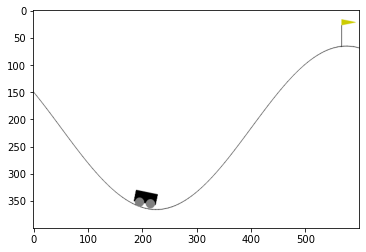

In [7]:
#starter code
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(5000):
  action = env.action_space.sample()
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
  
  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()
print("Iterations that were run:",i)

In [27]:
actionSpace = [0,1,2] #[-1,1]
numberOfStates = 150 ** 2
GAMMA = 0.9
ALPHA = 0.01

In [16]:
def max_dict(d):
    max_v = float('-inf')
    for key, val in d.items():
        if val > max_v:
            max_v = val
            max_key = key
    return max_key, max_v

In [17]:
def createBins():

    bins = np.zeros((2, 150))
    bins[0] = np.linspace(-1.20, 0.6, 150)
    bins[1] = np.linspace(-0.07, 0.07, 150)
    return bins

In [18]:
def assignBins(observation, bins):
    state = np.zeros(2)
    for i in range(2):
        state[i] = np.digitize(observation[i], bins[i])
    return state

In [19]:
#initilizing the action value function
def initQ():
  Q = {}

  for i in range(150):
    for j in range(150):
      Q[(i,j)] = {}
      for action in range(env.action_space.n):
        Q[(i,j)][action] = float(0)
  return Q

In [20]:
#initilize a random deterministic target policy
def initTargetPolicy():
  pi = {}

  for i in range(150):
    for j in range(150):
      pi[(i,j)]= np.random.choice(actionSpace)
  return pi

In [21]:
def initReturns():
    returns = {}
    
    for i in range(150):
        for j in range(150):
            returns[(i,j)] = {}
            for action in range(env.action_space.n):
                returns[(i,j)][action] = []
    return returns

In [22]:
# A function to handle the running of a single episode it maintains a lists of states, actions and rewards that it returns 
def episode(env, policy,bins):
    obs = env.reset()
    
    rewards = []
    actions = []
    states = []
    while True:
        state = tuple(assignBins(obs, bins))
        action = policy[state]#np.random.choice(actionSpace, p=policy[state])
        actions.append(action)
        states.append(state)

        obs, reward, done, info = env.step(action)
        rewards.append(reward)
        if done == True:
            prev_screen = env.render(mode='rgb_array')
            plt.imshow(prev_screen)
            break

    return states, actions, rewards

In [23]:
bins= createBins()

In [28]:
q= initQ()

In [29]:
pi=initTargetPolicy()

In [30]:
returns = initReturns()

D:\SOFTWARE\Anaconda3\lib\site-packages\gym\core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


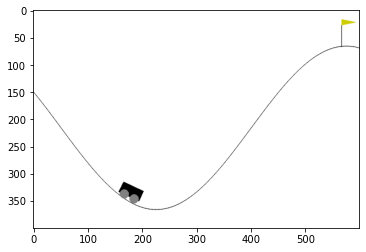

In [31]:
states, actions, rewards= episode(env,pi,bins)

episode: 0
episode: 1
episode: 2
episode: 3
episode: 4
episode: 5
episode: 6
episode: 7
episode: 8
episode: 9
episode: 10
episode: 11
episode: 12
episode: 13
episode: 14
episode: 15
episode: 16
episode: 17
episode: 18
episode: 19
episode: 20
episode: 21
episode: 22
episode: 23
episode: 24
episode: 25
episode: 26
episode: 27
episode: 28
episode: 29
episode: 30
episode: 31
episode: 32
episode: 33
episode: 34
episode: 35
episode: 36
episode: 37
episode: 38
episode: 39
episode: 40
episode: 41
episode: 42
episode: 43
episode: 44
episode: 45
episode: 46
episode: 47
episode: 48
episode: 49
episode: 50
episode: 51
episode: 52
episode: 53
episode: 54
episode: 55
episode: 56
episode: 57
episode: 58
episode: 59
episode: 60
episode: 61
episode: 62
episode: 63
episode: 64
episode: 65
episode: 66
episode: 67
episode: 68
episode: 69
episode: 70
episode: 71
episode: 72
episode: 73
episode: 74
episode: 75
episode: 76
episode: 77
episode: 78
episode: 79
episode: 80
episode: 81
episode: 82
episode: 83
ep

episode: 640
episode: 641
episode: 642
episode: 643
episode: 644
episode: 645
episode: 646
episode: 647
episode: 648
episode: 649
episode: 650
episode: 651
episode: 652
episode: 653
episode: 654
episode: 655
episode: 656
episode: 657
episode: 658
episode: 659
episode: 660
episode: 661
episode: 662
episode: 663
episode: 664
episode: 665
episode: 666
episode: 667
episode: 668
episode: 669
episode: 670
episode: 671
episode: 672
episode: 673
episode: 674
episode: 675
episode: 676
episode: 677
episode: 678
episode: 679
episode: 680
episode: 681
episode: 682
episode: 683
episode: 684
episode: 685
episode: 686
episode: 687
episode: 688
episode: 689
episode: 690
episode: 691
episode: 692
episode: 693
episode: 694
episode: 695
episode: 696
episode: 697
episode: 698
episode: 699
episode: 700
episode: 701
episode: 702
episode: 703
episode: 704
episode: 705
episode: 706
episode: 707
episode: 708
episode: 709
episode: 710
episode: 711
episode: 712
episode: 713
episode: 714
episode: 715
episode: 716

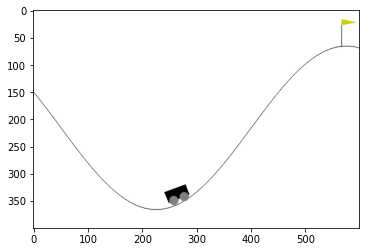

In [32]:
# the main program the iterates over episodes to calculate estimate the value of q 
# using the behaviour policy and improve the policy with off policy monte carlo
env = gym.make('MountainCar-v0')

#constants chosen by us
eps = 0.05
gamma = 1

#iterate 1000 times
for i in range(1000):
    states, actions, rewards = episode(env, pi, bins) # run one episode
    print("episode:", i)
    G=0
    seen = set()
    for i, (state, action, reward) in enumerate(zip(reversed(states), reversed(actions), reversed(rewards))):
        G = G * gamma + reward
        seen.add((state,action))
        returns[state][action].append(G)
        q[state][action] = sum(returns[state][action]) / len(returns[state][action])
        maxAction = pi[state]
        if np.random.uniform() < 1 - eps:
            values = np.array([q[state][a] for a in actionSpace])
            best = np.random.choice(np.where(values == values.max())[0])
            pi[state] = actionSpace[best]
        else:
            pi[state] = np.random.choice(actionSpace)

In [60]:
# testing the learned target policy on the enviroment again
obs = env.reset()
rewards = []
actions = []
states = []

while True:
    state = tuple(assignBins(obs, bins))
    action = pi[state]
    actions.append(action)
    states.append(state)

    obs, reward, done, info = env.step(action)
    rewards.append(reward)
    if done == True:
        break

print (states)

[(66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 76.0), (66.0, 76.0), (66.0, 76.0), (67.0, 76.0), (66.0, 74.0), (66.0, 74.0), (66.0, 74.0), (66.0, 74.0), (66.0, 74.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 76.0), (66.0, 76.0), (66.0, 76.0), (66.0, 76.0), (67.0, 76.0), (66.0, 74.0), (66.0, 74.0), (66.0, 74.0), (66.0, 74.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 76.0), (66.0, 76.0), (66.0, 76.0), (67.0, 76.0), (66.0, 74.0), (66.0, 74.0), (66.0, 74.0), (66.0, 74.0), (66.0, 74.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 76.0), (66.0, 76.0), (66.0, 76.0), (66.0, 76.0), (67.0, 76.0), (66.0, 74.0), (66.0, 74.0), (66.0, 74.0), (66.0, 74.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 75.0), (66.0, 76.0), (66.0, 76.0), (66.0, 76.0), (67.0, 76.0), (66.0, 74.0), (66.0